![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/Anton', force_remount=True)

import os

project_path = "/content/Anton/My Drive/Colab Notebooks/Adv Computer Vision/Assignment"
os.chdir(project_path)
print(os.getcwd())

Mounted at /content/Anton
/content/Anton/My Drive/Colab Notebooks/Adv Computer Vision/Assignment


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [2]:
import numpy as np
data = np.load('./images.npy', allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)
- Hint: print data[10][1] 

In [3]:
print(data[0][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063}, {'x': 0.1723076923076923, 'y': 0.45345345345345345}], 'imageWidth': 650, 'imageHeight': 333}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}], 'imageWidth': 650, 'imageHeight': 333}]


### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [4]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [5]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [6]:
X.shape

(409, 224, 224, 3)

### Split the data into training and testing (2 marks)
- 400 images in training
- 9 images in testing data

Training data

In [7]:
X_train = X[0:400]
y_train = masks[0:400]

In [8]:
X_train.shape

(400, 224, 224, 3)

Testing data

In [9]:
X_test = X[400:]
y_test = masks[400:]

In [10]:
X_test.shape

(9, 224, 224, 3)

### Print a sample training image, image array and its mask (2 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image


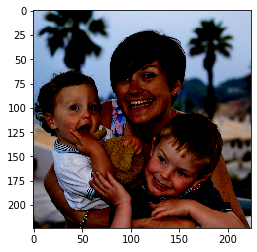

Image array : [[[ 0.64705884  0.77254903  0.89803922]
  [ 0.64705884  0.77254903  0.89803922]
  [ 0.65490198  0.78039217  0.90588236]
  ...
  [ 0.72549021  0.79607844  0.9137255 ]
  [ 0.71764708  0.78823531  0.90588236]
  [ 0.71764708  0.78823531  0.90588236]]

 [[ 0.64705884  0.77254903  0.89803922]
  [ 0.64705884  0.77254903  0.89803922]
  [ 0.64705884  0.77254903  0.89803922]
  ...
  [ 0.71764708  0.78823531  0.90588236]
  [ 0.71764708  0.78823531  0.90588236]
  [ 0.71764708  0.78823531  0.90588236]]

 [[ 0.64705884  0.77254903  0.89803922]
  [ 0.64705884  0.77254903  0.89803922]
  [ 0.64705884  0.77254903  0.89803922]
  ...
  [ 0.71764708  0.78823531  0.90588236]
  [ 0.71764708  0.78823531  0.90588236]
  [ 0.71764708  0.78823531  0.90588236]]

 ...

 [[-0.41960782 -0.34901959 -0.78823531]
  [-0.41176468 -0.33333331 -0.80392158]
  [-0.31764704 -0.27843136 -0.78039217]
  ...
  [ 0.28627455  0.09803927 -0.02745098]
  [ 0.7019608   0.67058825  0.66274512]
  [ 0.68627453  0.72549021  0.

In [11]:
from matplotlib import pyplot as plt

print("Image")
plt.imshow(X[400], interpolation='nearest')
plt.show()

print("Image array : {}".format(X[400]))

Print the mask

Image


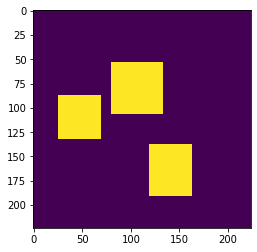

Masks : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:

print("Image")
plt.imshow(masks[400], interpolation='nearest')
plt.show()


print("Masks : {}".format(masks[400]))

## Create the model (5 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [13]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block_0 = model.get_layer("conv_pw_1_relu").output
    block_1 = model.get_layer("conv_pw_3_relu").output
    block_2 = model.get_layer("conv_pw_5_relu").output
    block_3 = model.get_layer("conv_pw_11_relu").output
    block_4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block_4), block_3])
    x = Concatenate()([UpSampling2D()(x), block_2])
    x = Concatenate()([UpSampling2D()(x), block_1])
    x = Concatenate()([UpSampling2D()(x), block_0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function (1 mark)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [14]:
model = create_model()

### Print model summary (1 mark)

In [15]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

### Define dice coefficient function (2 marks)
- Create a function to calculate dice coefficient


In [16]:
from tensorflow import math
from tensorflow.keras.backend import epsilon

def _dicecoefficient(y_true, y_pred):
    numerator = 2 * math.reduce_sum(y_true * y_pred)
    denominator = math.reduce_sum(y_true + y_pred)

    return numerator / (denominator + epsilon())

### Define loss function (2 marks)

In [17]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

def _loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(_dicecoefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [18]:
model.compile(loss=_loss, optimizer='adam', metrics=[_dicecoefficient])

### Define callbacks (2 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

_checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=5)

_stop = EarlyStopping(monitor="loss", patience=5, mode="min")

_reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [20]:
model.fit(X_train, y_train, batch_size=1, epochs=10, callbacks=[_checkpoint, _reduce_lr, _stop])

Epoch 1/10
  3/400 [..............................] - ETA: 9s - loss: 2.5699 - _dicecoefficient: 0.2252
Epoch 00001: loss improved from inf to 2.37565, saving model to model-2.38.h5
  9/400 [..............................] - ETA: 21s - loss: 2.0953 - _dicecoefficient: 0.3299
Epoch 00001: loss improved from 2.37565 to 2.10165, saving model to model-2.10.h5
 14/400 [>.............................] - ETA: 23s - loss: 1.9370 - _dicecoefficient: 0.3449
Epoch 00001: loss improved from 2.10165 to 1.92970, saving model to model-1.93.h5
 19/400 [>.............................] - ETA: 24s - loss: 1.8480 - _dicecoefficient: 0.3990
Epoch 00001: loss improved from 1.92970 to 1.81442, saving model to model-1.81.h5
 24/400 [>.............................] - ETA: 24s - loss: 1.7546 - _dicecoefficient: 0.4238
Epoch 00001: loss improved from 1.81442 to 1.74218, saving model to model-1.74.h5
 29/400 [=>............................] - ETA: 24s - loss: 1.7233 - _dicecoefficient: 0.4401
Epoch 00001: loss im

### Get the predicted mask for a test image   (2 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


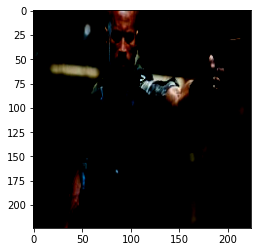

In [21]:
sample_image = X_test[6]
plt.imshow(sample_image)

Show original mask for test image

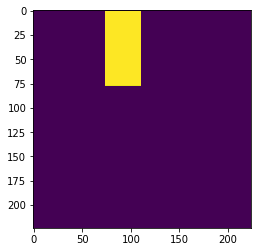

In [22]:
plt.imshow(y_test[6])

Predict the mask on the test image

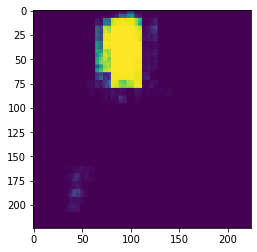

In [23]:
resized_sample_image = np.expand_dims(sample_image, axis=0)

mask = model.predict(resized_sample_image)

mask = np.reshape(mask, (224, 224))

plt.imshow(mask)

### Impose the mask on the test image (2 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


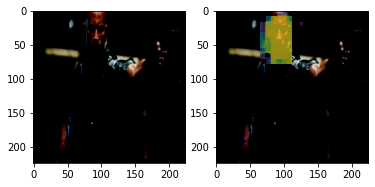

In [24]:
masked = np.ma.masked_where(mask < 0.1, mask)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample_image)

plt.subplot(1,2,2)
plt.imshow(sample_image)

plt.imshow(masked, alpha=0.6)
plt.show()